<a href="https://colab.research.google.com/github/utkarshg1/Test1/blob/main/Multiclass_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Classification

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd
url1 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/train_weather.csv"
df = pd.read_csv(url1)
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


### Target feature is Weather Type

### Step 1 - Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [4]:
df.isna().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [5]:
df.duplicated().sum()

0

### Step 3 - Seperate X and Y

In [6]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [7]:
X = df.drop(columns=["Weather Type"])
Y = df[["Weather Type"]]

In [8]:
X.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain


In [9]:
Y.head()

,Weather Type
0,Rainy
1,Cloudy
2,Sunny
3,Sunny
4,Rainy


In [10]:
Y.value_counts()

,count
Weather Type,
Cloudy,3300
Rainy,3300
Snowy,3300
Sunny,3300


<Axes: xlabel='Weather Type'>

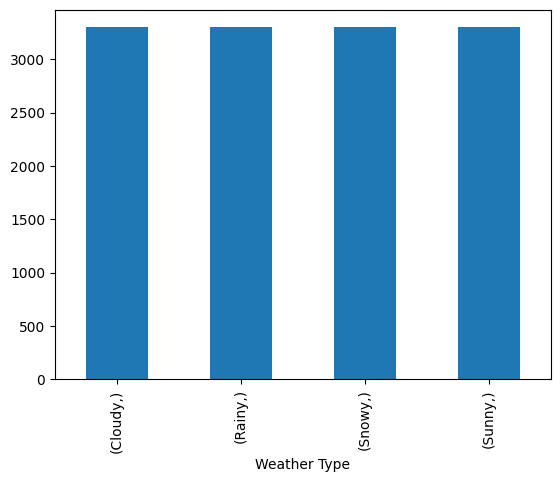

In [11]:
Y.value_counts().plot(kind="bar")

### Step 4 - Apply preprocessing on X

In [12]:
X.dtypes

,0
Temperature,float64
Humidity,int64
Wind Speed,float64
Precipitation (%),float64
Cloud Cover,object
Atmospheric Pressure,float64
UV Index,int64
Season,object
Visibility (km),float64
Location,object


In [13]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
num_pipe = make_pipeline(
    SimpleImputer(strategy = "median"),
    StandardScaler()
)

In [16]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy = "most_frequent"),
    OneHotEncoder(handle_unknown= "ignore", sparse_output=False)
)

In [17]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, con),
        ("cat", cat_pipe, cat)
    ]
).set_output(transform= "pandas")

In [18]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_clear,cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,-0.878846,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Step 5 - Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [20]:
xtrain.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_clear,cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain
3958,0.740404,-0.134243,-0.554712,1.200664,0.117804,-0.520104,-1.175461,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2239,-0.237413,1.351385,0.169040,0.105042,0.299802,-1.038715,-0.433923,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3608,0.510330,-0.530410,-0.482337,-1.334918,0.525351,1.554340,1.049153,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6848,1.603184,0.757134,5.018179,0.981540,-0.364746,-0.520104,-1.027154,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6119,-0.064857,-0.134243,0.603291,-1.366221,-0.155596,-0.779410,0.752538,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
ytrain.head()

,Weather Type
3958,Rainy
2239,Rainy
3608,Sunny
6848,Rainy
6119,Cloudy


In [22]:
xtest.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_clear,cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain
4111,0.222737,-1.520829,-0.771838,-1.491435,0.412980,1.295035,1.345768,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10607,2.465964,1.252343,0.675666,0.918933,0.530728,1.554340,-0.433923,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7372,1.200553,-0.877057,-1.133714,-1.303614,0.519437,1.035729,0.752538,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
11786,-1.502823,0.509529,-0.482337,1.138057,-0.329798,-1.038715,-1.175461,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
12227,0.107699,1.252343,0.024290,1.732823,0.588257,1.813646,1.049153,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [23]:
ytest.head()

,Weather Type
4111,Sunny
10607,Sunny
7372,Sunny
11786,Snowy
12227,Sunny


In [24]:
xtrain.shape

(10560, 18)

In [25]:
xtest.shape

(2640, 18)

### For multiclass classification apply OneHotEncoding on Y

In [26]:
ohe = OneHotEncoder(
    handle_unknown="ignore", sparse_output= False
).set_output(transform ="pandas")

In [27]:
ytrain_pre = ohe.fit_transform(ytrain)
ytest_pre = ohe.transform(ytest)

In [28]:
ytrain_pre

,Weather Type_Cloudy,Weather Type_Rainy,Weather Type_Snowy,Weather Type_Sunny
3958,0.0,1.0,0.0,0.0
2239,0.0,1.0,0.0,0.0
3608,0.0,0.0,0.0,1.0
6848,0.0,1.0,0.0,0.0
6119,1.0,0.0,0.0,0.0
...,...,...,...,...
11964,0.0,1.0,0.0,0.0
5191,0.0,1.0,0.0,0.0
5390,1.0,0.0,0.0,0.0
860,1.0,0.0,0.0,0.0


In [29]:
ytest_pre

,Weather Type_Cloudy,Weather Type_Rainy,Weather Type_Snowy,Weather Type_Sunny
4111,0.0,0.0,0.0,1.0
10607,0.0,0.0,0.0,1.0
7372,0.0,0.0,0.0,1.0
11786,0.0,0.0,1.0,0.0
12227,0.0,0.0,0.0,1.0
...,...,...,...,...
2543,0.0,1.0,0.0,0.0
96,0.0,1.0,0.0,0.0
2474,0.0,0.0,1.0,0.0
2522,0.0,0.0,1.0,0.0


### Step 6 - Build the neural network
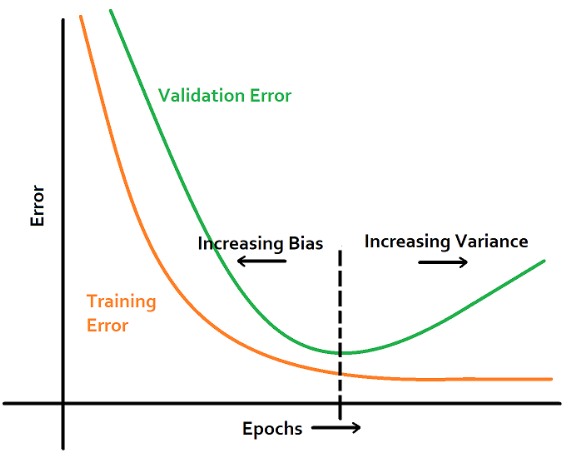

In [31]:
xtrain.shape[1]

18

In [33]:
ytrain_pre.shape[1]

4

In [30]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping

In [34]:
# Intiaalize the model
model = Sequential()

# Add input layer
model.add(Input( shape = (xtrain.shape[1],) ))

# Add dense layer 1
model.add(Dense(units = 32, activation="relu"))
# Add dropout layer 1
model.add(Dropout(rate=0.3))

# Add dense layer 2
model.add(Dense(units= 16, activation="relu"))
# Add dropout layer 2
model.add(Dropout(rate=0.2))

# For multiclass classification sofmax activation
model.add(Dense(units = ytrain_pre.shape[1], activation="softmax"))

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,204 (4.70 KB)

 Trainable params: 1,204 (4.70 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [37]:
es = EarlyStopping(patience = 10)

In [38]:
hist = model.fit(xtrain, ytrain_pre, validation_split=0.2, epochs=200, callbacks = [es])

Epoch 1/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5181 - loss: 1.1228 - val_accuracy: 0.8494 - val_loss: 0.5832
Epoch 2/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7980 - loss: 0.6576 - val_accuracy: 0.8873 - val_loss: 0.3920
Epoch 3/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8434 - loss: 0.5185 - val_accuracy: 0.8902 - val_loss: 0.3242
Epoch 4/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8558 - loss: 0.4545 - val_accuracy: 0.8935 - val_loss: 0.2930
Epoch 5/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8651 - loss: 0.4059 - val_accuracy: 0.9062 - val_loss: 0.2684
Epoch 6/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8712 - loss: 0.3785 - val_accuracy: 0.9048 - val_loss: 0.2601
Epoch 7/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8766 - loss: 0.3635 - val_accuracy: 0.9067 - val_loss: 0.2493
Epoch 8/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8804 - loss: 0.3437 - val_accu

### Check learning curve

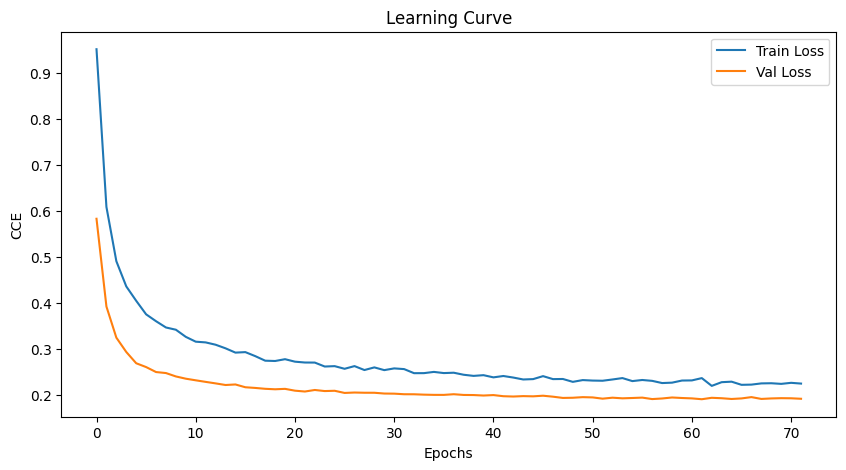

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("CCE")
plt.title("Learning Curve")
plt.legend()
plt.show()

### Model evaluation

In [40]:
model.evaluate(xtrain, ytrain_pre)

330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9099 - loss: 0.1834


[0.18317638337612152, 0.911837100982666]

In [41]:
model.evaluate(xtest, ytest_pre)

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8937 - loss: 0.2187


[0.21026299893856049, 0.9022727012634277]